In [2]:
import numpy as np
import math
import pdb
import csv
import cv2
import sys
import random
#
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.color import rgb2gray
#
from scipy import signal
#
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers import Cropping2D
# Fix error with TF and Keras
import tensorflow as tf
tf.python.control_flow_ops = tf
#
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

Using TensorFlow backend.


In [5]:
## Global Config Data
DATADIR = "./data/data/"
DRIVING_LOG_FILE = DATADIR + "/driving_log.csv"
IMGDIR = DATADIR + "/IMG/"

(160, 320, 3)
(160, 320, 3)
(160, 320, 3)


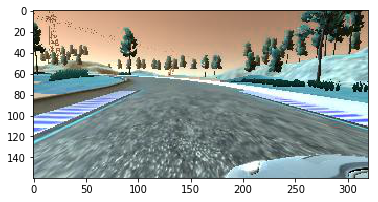

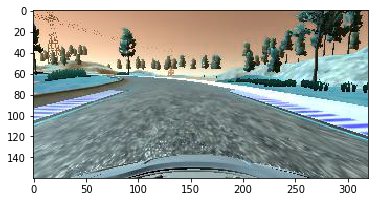

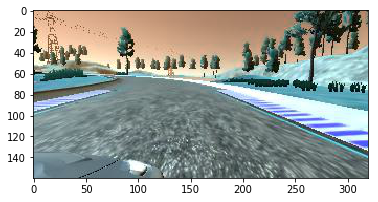

In [11]:
def convertToGrayscale(img):
    img = rgb2gray(img)
    img.shape += (1, )
    return img

def getInputSamples():
    """ Reads the contents of the
    driving log file and returns a
    list of tuples containing the image
    and steering angle
    """
    samples = []
    with open(DRIVING_LOG_FILE, "r") as dlfile:
        dlreader = csv.reader(dlfile)
        skipHeader = True
        for line in dlreader:
            if skipHeader:
                skipHeader = False
                continue
            cfile = line[0].split("\\")[-1]
            lfile = line[1].split("\\")[-1]
            rfile = line[2].split("\\")[-1]
            samples.append((lfile, cfile, rfile, float(line[3])))
    return samples

def cropImage(img):
    #return img[50:140, 0:320]
    return img

def plotImage(files):
    for f in files:
        ifile = IMGDIR + f
        fig = plt.figure()
        img = cropImage(cv2.imread(ifile))
        print(img.shape)
        plt.imshow(img)
                           
###

samples = getInputSamples()
ri = random.randint(0, len(samples))
plotImage(samples[ri][0:-1])